## Problem Statement:
"To analyze trends and patterns in artificial intelligence (AI) news coverage across multiple tech news sources, identifying key topics, publication patterns, and differences between sources to gain insights into the current state and evolution of AI discourse in the media."


# Objectives:
    
    1. Collect and analyze AI-related news articles from multiple reputable tech news sources.
    2. Identify the most frequently discussed AI topics and technologies.
    3. Analyze the volume and frequency of AI news publication over time.
    4. Compare and contrast AI coverage across different news sources.
    5. Identify potential biases or trends in AI news reporting.

## STAGE [1] :Web-Scrapping & Data Cleaning

In [1]:
# Let's start with something straightforward: parsing an RSS feed to collect AI-related news articles. We'll use the feedparser library, which makes it easy to work with RSS feeds.

In [2]:
pip install feedparser

###### **A Bit about Feedparser for reference** : https://feedparser.readthedocs.io/en/latest/introduction.html


In [3]:
pip install beautifulsoup4 python-dateutil

Note: you may need to restart the kernel to use updated packages.


###### **Reference** : 
Beautifulsoup - https://beautiful-soup-4.readthedocs.io/en/latest/#:~:text=Beautiful%20Soup%20is%20a%20Python,hours%20or%20days%20of%20work
Dateutil - https://dateutil.readthedocs.io/en/stable/


In [4]:
# Importing required libraries (1)
import feedparser
import csv
from datetime import datetime
import time
import random
import re
from bs4 import BeautifulSoup
from dateutil import parser as date_parser

#### Data Cleaning :

In [5]:
# Cleaning the data that we will be scrapping
def clean_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    clean = soup.get_text()
    # Remove extra whitespace
    clean = re.sub(r'\s+', ' ', clean).strip()
    return clean

def clean_date(date_string):
    try:
        # Parse the date string
        parsed_date = date_parser.parse(date_string)
        # Format the date consistently
        return parsed_date.strftime("%Y-%m-%d %H:%M:%S")
    except:
        return ''


#### Data Sourcing :

In [6]:
# Defining function to read the data from rss feeds of newsletters

def parse_rss(url, source):
    try:
        
        feed = feedparser.parse(url)
        articles = []
        for entry in feed.entries:
            article = {
                'Title': clean_text(entry.get('title', '')),
                'Link': entry.get('link', ''),
                'Published': clean_date(entry.get('published', '')),
                'Summary': clean_text(entry.get('summary', '')),
                'Source': source
            }
            articles.append(article)
        return articles
    except Exception as e:
        print(f"Error parsing {source} feed: {str(e)}")
        return []

In [7]:
# Defining a function to read the output of the above function into a csv

def save_to_csv (articles, filename):
    if not articles:
        print('No articles to save')
        return
    
    fieldnames = ['Title', 'Link','Published','Summary','Source']
   #using open function below, 'w' is used to indicate that we are writing in the file after opening it.  
    try:
        with open(filename, 'w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()
            for article in articles:
                writer.writerow(article)
        print(f"Successfully saved {len(articles)} articles to {filename}")
    except Exception as e:
        print(f"Error saving to CSV: {str(e)}")

In [8]:
# RSS feed URL for TechCrunch's AI category
feeds = [
    ("https://techcrunch.com/category/artificial-intelligence/feed/", "TechCrunch"),
    ("https://www.artificialintelligence-news.com/feed/", "AI News"),
    ("https://bigdataanalyticsnews.com/feed/", "BigdataAnalytics"),
    ("https://venturebeat.com/category/ai/feed/", "Venturebeat"),
    ("https://www.technologyreview.com/topic/artificial-intelligence/feed", "MIT"),
]

# Collect all the articles from the feeds

all_articles = []
for url, source in feeds:
    print(f"Fetching articles from {source}...")
    articles = parse_rss(url,source)
    all_articles.extend(articles)
    print(f'Collected {len(articles)} articles from {source}')
    time.sleep(random.uniform(1, 3))  # Random delay between requests

    
# Generate a file name with current date
curr_date = datetime.now().strftime('%Y%m%d')
filename = f'ai_news_{curr_date}.csv'

# Save the articles to a CSV file
save_to_csv(all_articles, filename)

print(f"Total articles collected: {len(all_articles)}")  

Fetching articles from TechCrunch...
Collected 20 articles from TechCrunch
Fetching articles from AI News...
Collected 10 articles from AI News
Fetching articles from BigdataAnalytics...
Collected 10 articles from BigdataAnalytics
Fetching articles from Venturebeat...
Collected 30 articles from Venturebeat
Fetching articles from MIT...
Collected 10 articles from MIT
Successfully saved 80 articles to ai_news_20240709.csv
Total articles collected: 80


## STAGE [2] : Exploratory Data Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\91991\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\91991\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
# Loading the cleaned data to a dataframe
df = pd.read_csv('ai_news_20240709.csv')

In [11]:
# Lets look at the file
df.head()

,Title,Link,Published,Summary,Source
0,Alexa co-creator gives first glimpse of Unlike...,https://techcrunch.com/2024/07/09/alexa-co-cre...,2024-07-09 16:30:09,After announcing a whopping $20 million seed l...,TechCrunch
1,Humane execs leave company to found AI fact-ch...,https://techcrunch.com/2024/07/09/humane-execs...,2024-07-09 14:49:00,Infactory is a kind of fact-checking search en...,TechCrunch
2,"With $6M in seed funding, Enso plans to bring ...",https://techcrunch.com/2024/07/09/with-6m-in-s...,2024-07-09 13:01:00,Running a small business means doing more with...,TechCrunch
3,Etsy adds AI-generated item guidelines in new ...,https://techcrunch.com/2024/07/09/etsy-new-sel...,2024-07-09 12:09:07,Etsy has been grappling with an influx of gene...,TechCrunch
4,Ex-Googler joins filmmaker to launch DreamFlar...,https://techcrunch.com/2024/07/09/dreamflare-a...,2024-07-09 11:00:00,A startup called DreamFlare AI is emerging fro...,TechCrunch


In [12]:
# 1. Dataset Dimensions
print(f'Dataset has {df.shape} rows and columns')

Dataset has (80, 5) rows and columns


In [13]:
# 2. Basic Information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      80 non-null     object
 1   Link       80 non-null     object
 2   Published  80 non-null     object
 3   Summary    80 non-null     object
 4   Source     80 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB
None


##### Published data type should be in date format, we will change that when we are doing univariate

In [14]:
# 3. Summary Statistics
print("\nSummary Statistics:")

print(df.describe())


Summary Statistics:
                                                    Title  \
count                                                  80   
unique                                                 80   
top     Alexa co-creator gives first glimpse of Unlike...   
freq                                                    1   

                                                     Link  \
count                                                  80   
unique                                                 80   
top     https://techcrunch.com/2024/07/09/alexa-co-cre...   
freq                                                    1   

                  Published  \
count                    80   
unique                   79   
top     2024-07-08 16:00:00   
freq                      2   

                                                  Summary       Source  
count                                                  80           80  
unique                                                 80        

#### Univariate Analysis

In [15]:
# 1. Article count by Source
source_counts = df['Source'].value_counts()
print("\nArticle count by source:")
print(source_counts)


Article count by source:
Source
Venturebeat         30
TechCrunch          20
AI News             10
BigdataAnalytics    10
MIT                 10
Name: count, dtype: int64


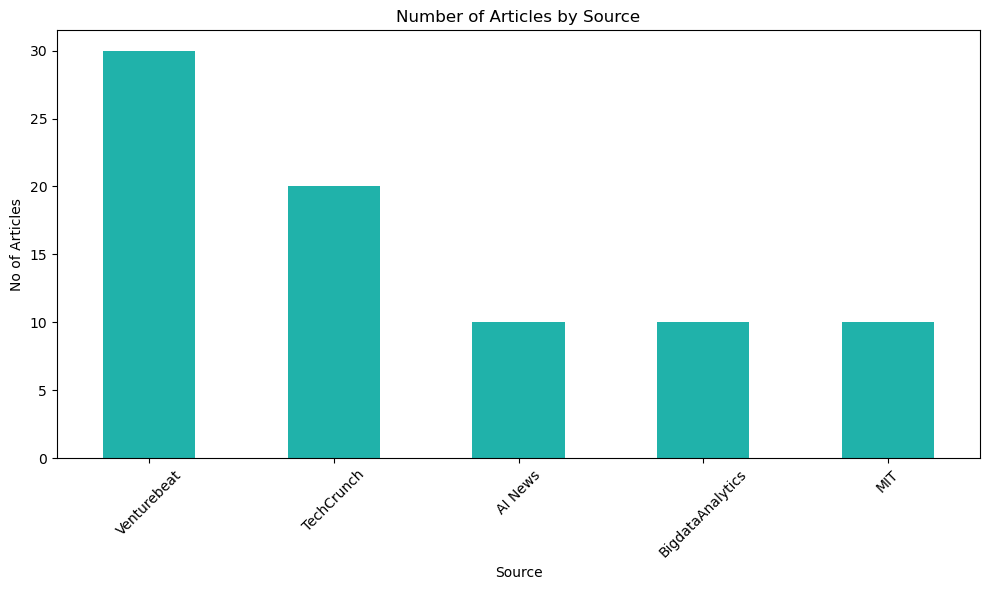

In [16]:
# Visualizing article count by source
plt.figure(figsize = (10,6))
source_counts.plot(kind='bar', color = 'lightseagreen')
plt.title('Number of Articles by Source')
plt.xlabel('Source')
plt.ylabel('No of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Bivariate Analysis

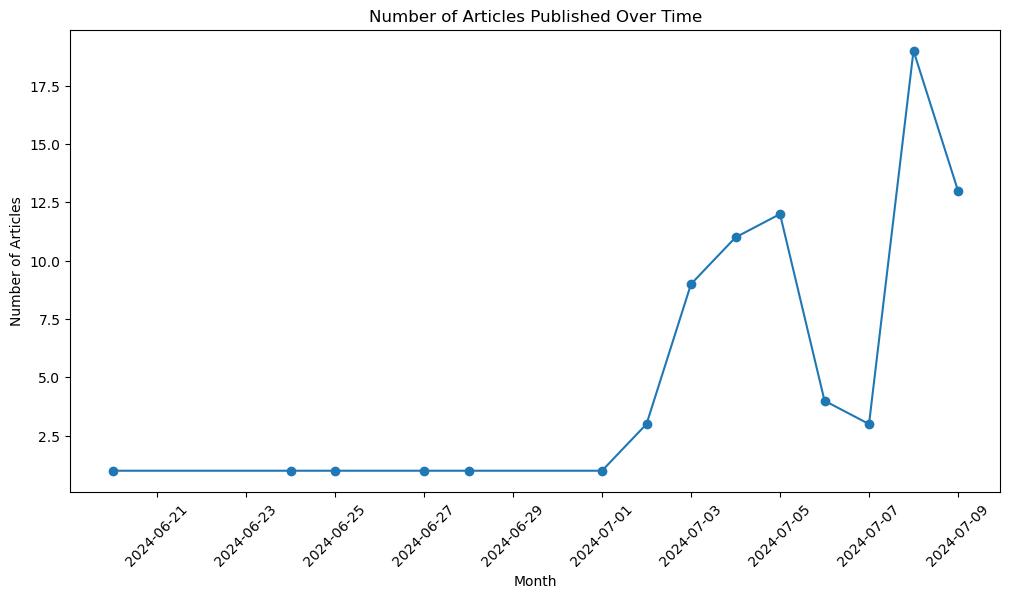

In [17]:
# 2. Articles over time
df['Published'] = pd.to_datetime(df['Published'])
df['Date'] = df['Published'].dt.date # created a date column to look at daily volume of articles
articles_per_day = df['Date'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(12, 6))
articles_per_day.plot(kind='line', marker = 'o')

plt.title('Number of Articles Published Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [18]:
# How many average articles on a day
avg_daily_article = articles_per_day.mean()
print(f"\nAverage number of articles per day: {avg_daily_article:.2f}")

# Daily with most and least articles
max_day = articles_per_day.idxmax()
min_day = articles_per_day.idxmin()
print(f"Month with most articles: {max_day} ({articles_per_day[max_day]} articles)")
print(f"Month with least articles: {min_day} ({articles_per_day[min_day]} articles)")



Average number of articles per day: 5.71
Month with most articles: 2024-07-08 (19 articles)
Month with least articles: 2024-06-20 (1 articles)


Article counts by month:
Year-Month
2024-06     5
2024-07    75
Freq: M, Name: count, dtype: int64

Average number of articles per month: 40.00
Month with most articles: 2024-07 (75 articles)
Month with least articles: 2024-06 (5 articles)


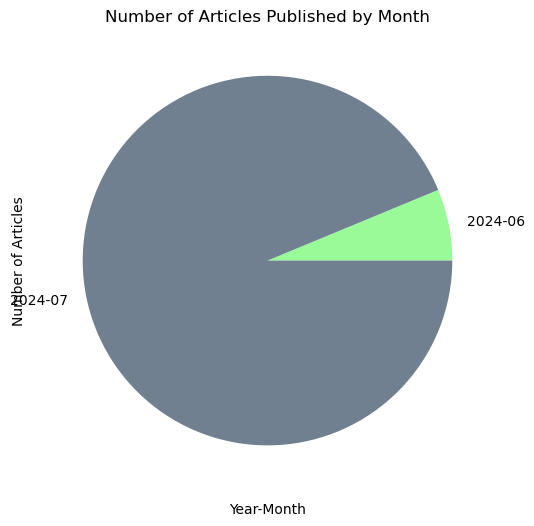

<Figure size 1400x800 with 0 Axes>

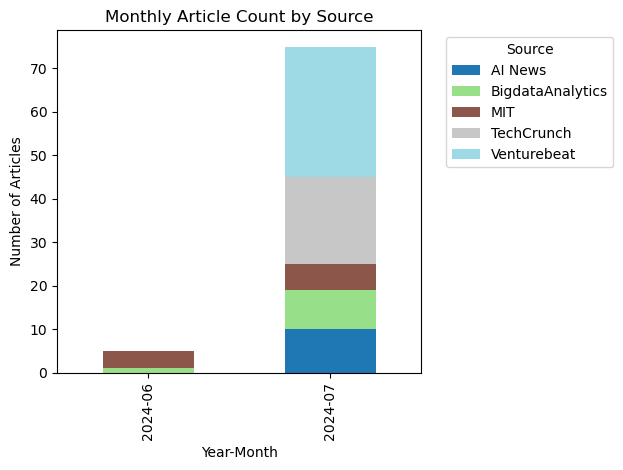


Monthly analysis completed.


In [19]:
# Extract year and month
df['Year-Month'] = df['Published'].dt.to_period('M')

# Count articles by year-month
monthly_counts = df['Year-Month'].value_counts().sort_index()

print("Article counts by month:")
print(monthly_counts)

# Visualize monthly trends
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='pie', colors = ['palegreen','slategrey'])
plt.title('Number of Articles Published by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

# Average articles per month
avg_per_month = monthly_counts.mean()
print(f"\nAverage number of articles per month: {avg_per_month:.2f}")

# Month with most and least articles
max_month = monthly_counts.idxmax()
min_month = monthly_counts.idxmin()
print(f"Month with most articles: {max_month} ({monthly_counts[max_month]} articles)")
print(f"Month with least articles: {min_month} ({monthly_counts[min_month]} articles)")

# Monthly trend by source
monthly_by_source = df.groupby(['Year-Month', 'Source']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
monthly_by_source.plot(kind='bar', stacked=True,cmap='tab20')
plt.title('Monthly Article Count by Source')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nMonthly analysis completed.")

   ## ANALYSIS [1] : Word Frequency in Title



Top 10 words in titles:
[('startup', 4), ('data', 4), ('industry', 4), ('generative', 4), ('ai’s', 3), ('tech', 3), ('seed', 3), ('new', 3), ('using', 3), ('help', 3)]


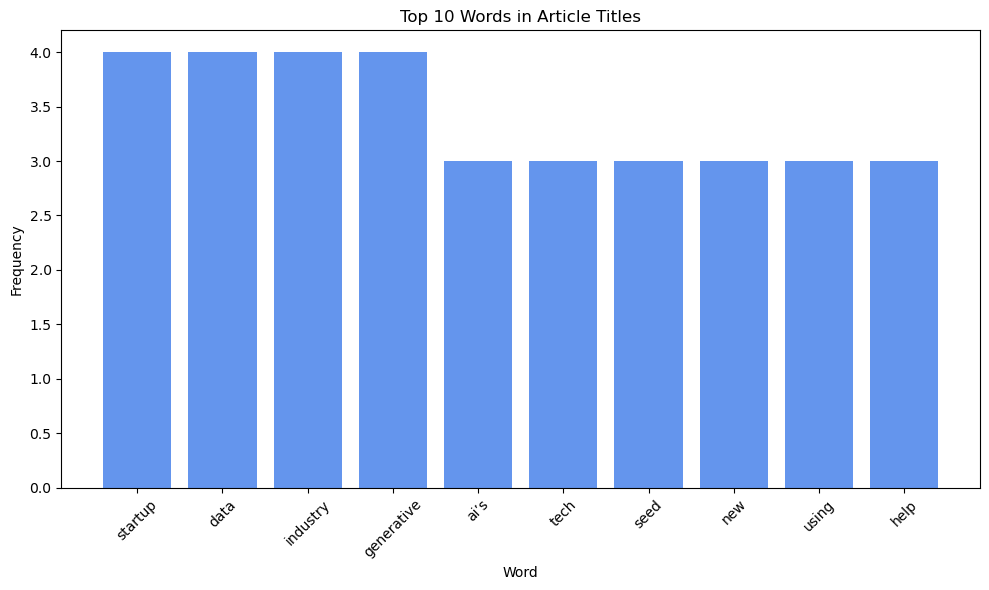

In [20]:
# 5. Word frequency in titles
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet = True)
stop_words = set(stopwords.words('english'))

def get_word_freq (text_series):
    words = ' '.join(text_series).lower().split()
    words = [word for word in words if word not in stop_words and len(word)>2]
    return Counter(words)

title_word_freq = get_word_freq(df['Title'])
print("\nTop 10 words in titles:")
print(title_word_freq.most_common(10))

# Visualizing
top_words = dict(title_word_freq.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(),color='cornflowerblue')
plt.title('Top 10 Words in Article Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()



In [21]:
df.head()

,Title,Link,Published,Summary,Source,Date,Year-Month
0,Alexa co-creator gives first glimpse of Unlike...,https://techcrunch.com/2024/07/09/alexa-co-cre...,2024-07-09 16:30:09,After announcing a whopping $20 million seed l...,TechCrunch,2024-07-09,2024-07
1,Humane execs leave company to found AI fact-ch...,https://techcrunch.com/2024/07/09/humane-execs...,2024-07-09 14:49:00,Infactory is a kind of fact-checking search en...,TechCrunch,2024-07-09,2024-07
2,"With $6M in seed funding, Enso plans to bring ...",https://techcrunch.com/2024/07/09/with-6m-in-s...,2024-07-09 13:01:00,Running a small business means doing more with...,TechCrunch,2024-07-09,2024-07
3,Etsy adds AI-generated item guidelines in new ...,https://techcrunch.com/2024/07/09/etsy-new-sel...,2024-07-09 12:09:07,Etsy has been grappling with an influx of gene...,TechCrunch,2024-07-09,2024-07
4,Ex-Googler joins filmmaker to launch DreamFlar...,https://techcrunch.com/2024/07/09/dreamflare-a...,2024-07-09 11:00:00,A startup called DreamFlare AI is emerging fro...,TechCrunch,2024-07-09,2024-07


## ANALYSIS [2] : BIG COMPANY MENTIONS



Mentions of big companies in AI articles:
OpenAI       14
Google        7
Apple         5
NVidia        5
Meta          4
Microsoft     3
Samsung       2
Amazon        0
IBM           0
dtype: int64


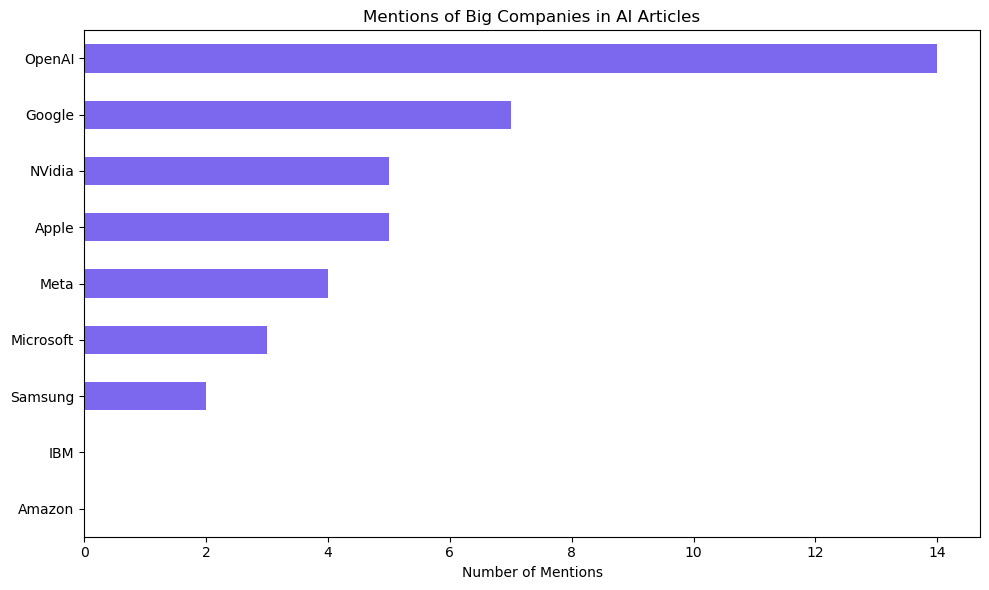

In [22]:
import re
import pandas as pd

def count_company_mentions(text, companies):
    return {company: len(re.findall(r'\b' + re.escape(company) + r'\b', text, re.IGNORECASE)) for company in companies}

# List of big tech companies
big_companies = ['Google', 'Microsoft', 'Apple', 'Amazon', 'Meta', 'IBM', 'OpenAI', 'NVidia','Samsung']

# Count mentions in titles and summaries
company_mentions = df.apply(lambda row: count_company_mentions(row['Title'] + ' ' + row['Summary'], big_companies), axis=1)

# Convert the series of dictionaries to a dataframe
mentions_df = pd.DataFrame(company_mentions.tolist(), index=company_mentions.index)

# Sum the mentions
total_mentions = mentions_df.sum()

print("\nMentions of big companies in AI articles:")
print(total_mentions.sort_values(ascending=False))

# Visualize
plt.figure(figsize=(10, 6))
total_mentions.sort_values().plot(kind='barh',color = 'mediumslateblue')
plt.title('Mentions of Big Companies in AI Articles')
plt.xlabel('Number of Mentions')
plt.tight_layout()



## ANALYSIS [3] : RANKING ARTICLES BY RECENCY, TITLE LENGTH, SUMMARY LENGTH


In [23]:
from tabulate import tabulate

In [24]:
# Rank articles by recency
df['Published'] = pd.to_datetime(df['Published'])
recent_articles = df.sort_values('Published', ascending=False).head(10)
print("\nMost recent articles:")
print(tabulate(recent_articles[['Title', 'Published', 'Source']],tablefmt='orgtbl'))

# Rank articles by title length (as a proxy for article depth)
df['Title_Length'] = df['Title'].str.len()
long_title_articles = df.sort_values('Title_Length', ascending=False).head(10)
print("\nArticles with longest titles:")
print(tabulate(long_title_articles[['Title', 'Title_Length', 'Source']],tablefmt='orgtbl'))

#  Rank by summary length if that's available
if 'Summary' in df.columns:
    df['Summary_Length'] = df['Summary'].str.len()
    long_summary_articles = df.sort_values('Summary_Length', ascending=False).head(10)
    print("\nArticles with longest summaries:")
    print(tabulate(long_summary_articles[['Title', 'Summary_Length', 'Source']],tablefmt='orgtbl'))


Most recent articles:
|  0 | Alexa co-creator gives first glimpse of Unlikely AI’s tech strategy              | 2024-07-09 16:30:09 | TechCrunch  |
|  1 | Humane execs leave company to found AI fact-checking startup                     | 2024-07-09 14:49:00 | TechCrunch  |
| 20 | SenseTime SenseNova 5.5: China’s first real-time multimodal AI model             | 2024-07-09 14:06:23 | AI News     |
| 21 | AI revolution in US education: How Chinese apps are leading the way              | 2024-07-09 13:02:35 | AI News     |
|  2 | With $6M in seed funding, Enso plans to bring AI agents to SMBs                  | 2024-07-09 13:01:00 | TechCrunch  |
| 40 | Aitomatic’s SemiKong uses AI to reshape chipmaking processes                     | 2024-07-09 13:00:00 | Venturebeat |
|  3 | Etsy adds AI-generated item guidelines in new seller policy                      | 2024-07-09 12:09:07 | TechCrunch  |
|  4 | Ex-Googler joins filmmaker to launch DreamFlare, a studio for AI-generated video | 2024-

## ANALYSIS [4] : Word Trends over time


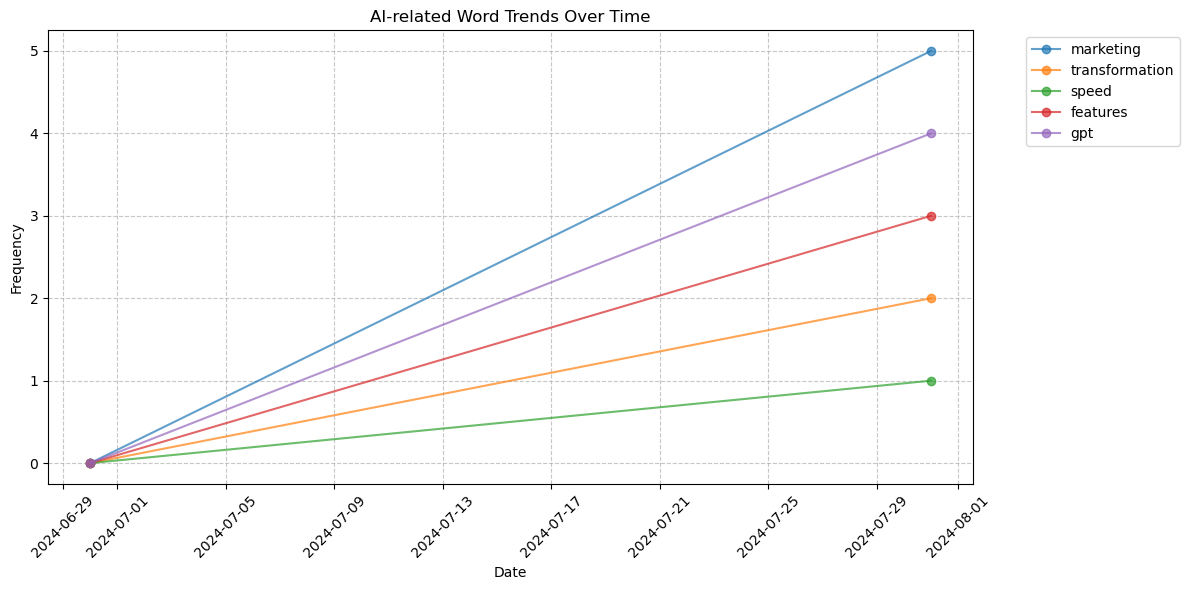

In [25]:
# Function to count word frequency
def count_word(text, word):
    return len(re.findall(r'\b' + re.escape(word) + r'\b', str(text).lower()))

# Words to track
words_to_track = ['marketing', 'transformation', 'speed', 'features', 'gpt']

# Count words in both Title and Summary
for word in words_to_track:
    df[word] = df['Title'].apply(lambda x: count_word(x, word)) + \
               df['Summary'].apply(lambda x: count_word(x, word))

# Group by publication date and sum word counts
word_trends = df.groupby('Published')[words_to_track].sum()

# Resample to get monthly counts (adjust as needed)
word_trends_monthly = word_trends.resample('ME').sum()

# Plot the trends
plt.figure(figsize=(12, 6))
for word in words_to_track:
    plt.plot(word_trends_monthly.index, word_trends_monthly[word], label=word, marker = 'o', alpha=0.7)

plt.title('AI-related Word Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## ANALYSIS [5] : Sentiment Analysis


In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

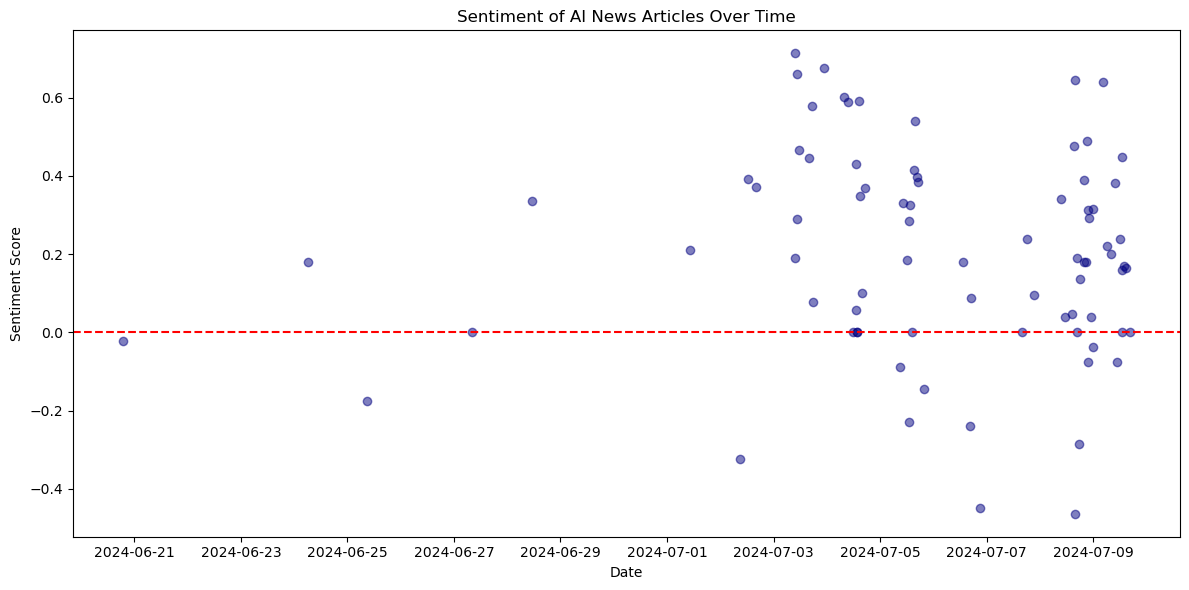

In [27]:
# Download necessary NLTK data
nltk.download('vader_lexicon', quiet=True)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_sentiment(text):
    return sia.polarity_scores(str(text))['compound']

# Apply sentiment analysis to Title and Summary
df['Title_sentiment'] = df['Title'].apply(get_sentiment)
df['Summary_sentiment'] = df['Summary'].apply(get_sentiment)

# Calculate overall sentiment
df['Overall_sentiment'] = (df['Title_sentiment'] + df['Summary_sentiment'])/2

# Plot sentiment over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Published'], df['Overall_sentiment'], alpha=0.5,color='navy')
plt.title('Sentiment of AI News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [28]:
# Print average sentiment
print(f"Average_sentiment: {df['Overall_sentiment'].mean():.2f}")

Average_sentiment: 0.20


In [29]:
# Count positive, negative, and neutral articles
positive = (df['Overall_sentiment'] > 0.05).sum()
negative = (df['Overall_sentiment'] < -0.05).sum()
neutral = ((df['Overall_sentiment'] >= -0.05) & (df['Overall_sentiment'] <= 0.05)).sum()

print(f"Positive articles: {positive}")
print(f"Negative articles: {negative}")
print(f"Neutral articles: {neutral}")

Positive articles: 55
Negative articles: 11
Neutral articles: 14


In [30]:
# Sentiment by source
sentiment_by_source = df.groupby('Source')['Overall_sentiment'].mean().sort_values(ascending=False)
print("\nAverage sentiment by source:")
print(sentiment_by_source)


Average sentiment by source:
Source
AI News             0.416525
BigdataAnalytics    0.327545
Venturebeat         0.181838
MIT                 0.133400
TechCrunch          0.100195
Name: Overall_sentiment, dtype: float64


In [31]:
# Most positive and negative articles
most_positive = df.loc[df['Overall_sentiment'].idxmax()]
most_negative = df.loc[df['Overall_sentiment'].idxmin()]

print("\nMost positive article:", most_positive['Title'])
print("Most negative article:", most_negative['Title'])


Most positive article: A way to let robots learn by listening will make them more useful
Most negative article: TechCrunch Minute: How to protect yourself from AI scams


In [32]:
# Sentiment trends over time
monthly_sentiment = df.groupby('Year-Month')['Overall_sentiment'].mean()

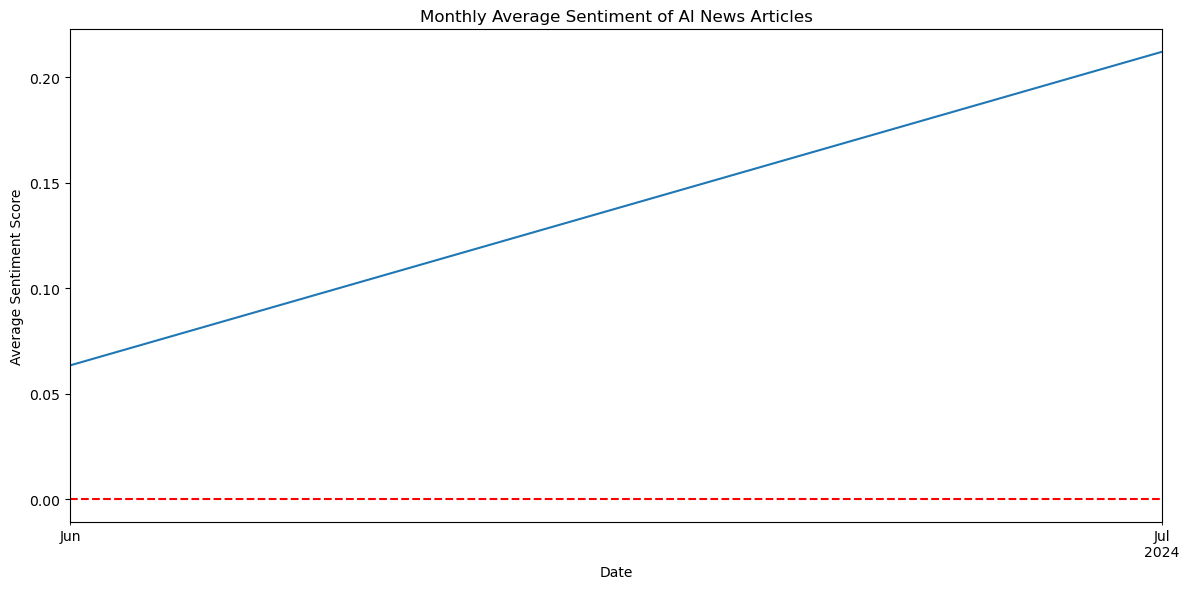

In [33]:
plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='line')
plt.title('Monthly Average Sentiment of AI News Articles')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()


In [34]:
df.head()

,Title,Link,Published,Summary,Source,Date,Year-Month,Title_Length,Summary_Length,marketing,transformation,speed,features,gpt,Title_sentiment,Summary_sentiment,Overall_sentiment
0,Alexa co-creator gives first glimpse of Unlike...,https://techcrunch.com/2024/07/09/alexa-co-cre...,2024-07-09 16:30:09,After announcing a whopping $20 million seed l...,TechCrunch,2024-07-09,2024-07,67,431,0,0,0,0,0,0.0000,0.0000,0.00000
1,Humane execs leave company to found AI fact-ch...,https://techcrunch.com/2024/07/09/humane-execs...,2024-07-09 14:49:00,Infactory is a kind of fact-checking search en...,TechCrunch,2024-07-09,2024-07,60,165,0,0,0,0,0,-0.0516,0.3818,0.16510
2,"With $6M in seed funding, Enso plans to bring ...",https://techcrunch.com/2024/07/09/with-6m-in-s...,2024-07-09 13:01:00,Running a small business means doing more with...,TechCrunch,2024-07-09,2024-07,63,409,0,0,0,0,0,0.0000,0.3182,0.15910
3,Etsy adds AI-generated item guidelines in new ...,https://techcrunch.com/2024/07/09/etsy-new-sel...,2024-07-09 12:09:07,Etsy has been grappling with an influx of gene...,TechCrunch,2024-07-09,2024-07,59,415,0,0,0,0,0,0.0000,0.4767,0.23835
4,Ex-Googler joins filmmaker to launch DreamFlar...,https://techcrunch.com/2024/07/09/dreamflare-a...,2024-07-09 11:00:00,A startup called DreamFlare AI is emerging fro...,TechCrunch,2024-07-09,2024-07,80,415,0,0,0,0,0,0.0000,-0.1531,-0.07655


In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize

# Combine title and summary for analysis
df['text'] = df['Title'] + ' ' + df['Summary']

# Preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess)

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['processed_text'])

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Function to print top words for each topic
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Print the top 10 words for each topic
print_topics(lda_model, vectorizer.get_feature_names_out(), 10)

# Add dominant topic to dataframe
df['dominant_topic'] = lda_output.argmax(axis=1)

# Print example articles for each topic
for i in range(5):
    print(f"\nExample article for Topic {i+1}:")
    example = df[df['dominant_topic'] == i].iloc[0]
    print(f"Title: {example['Title']}")
    print(f"Summary: {example['Summary'][:200]}...")

Topic 1: ai, software, financial, deployment, healthcare, generative, development, nvidia, worlds, potential
Topic 2: openai, new, robots, tasks, venture, aipowered, secures, post, shows, make
Topic 3: ai, techcrunch, use, personal, reserved, rights, data, big, processing, news
Topic 4: ai, model, industry, news, post, techcrunch, appeared, read, real, use
Topic 5: ai, like, appeared, generative, vb, digital, data, companies, way, computing

Example article for Topic 1:
Title: Nvidia: World’s most valuable company under French antitrust fire
Summary: Nvidia recently overtook Microsoft as the world’s most valuable company and is now in the crosshairs of French antitrust regulators. The French authority is preparing to charge Nvidia with anti-compet...

Example article for Topic 2:
Title: Apple secures ‘observer’ seat on OpenAI board
Summary: Following Apple’s partnership announcement with OpenAI at WWDC last month, a new report reveals that the tech giant will secure an “observer role” 

In [36]:
topic_distribution = df['dominant_topic'].value_counts().sort_index()
print(topic_distribution)

dominant_topic
0    12
1     8
2    26
3    17
4    17
Name: count, dtype: int64


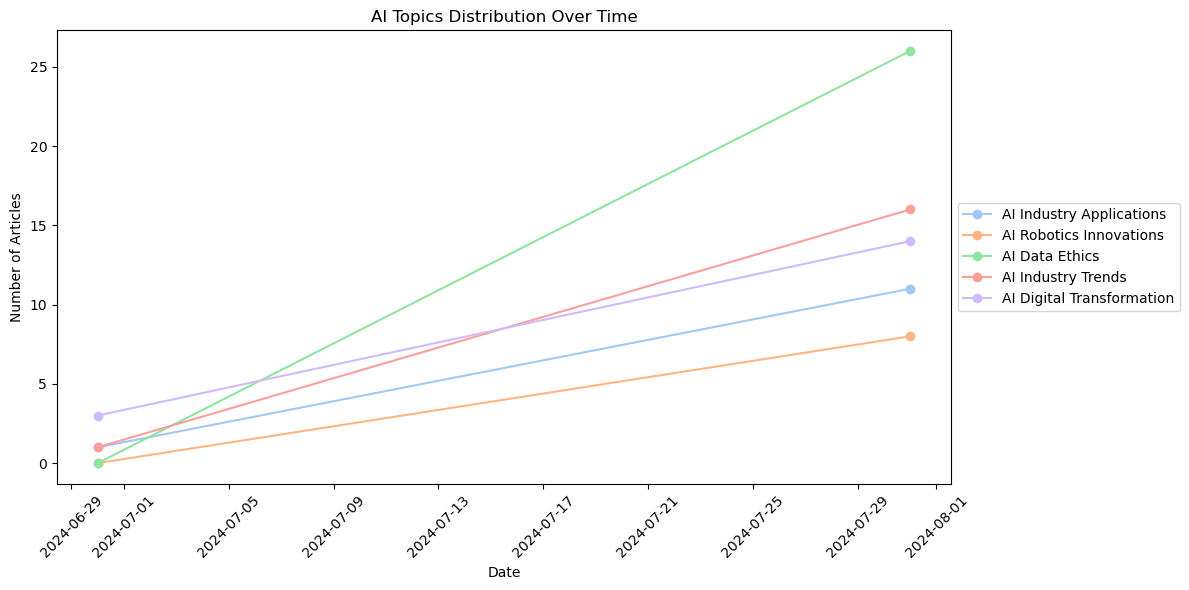

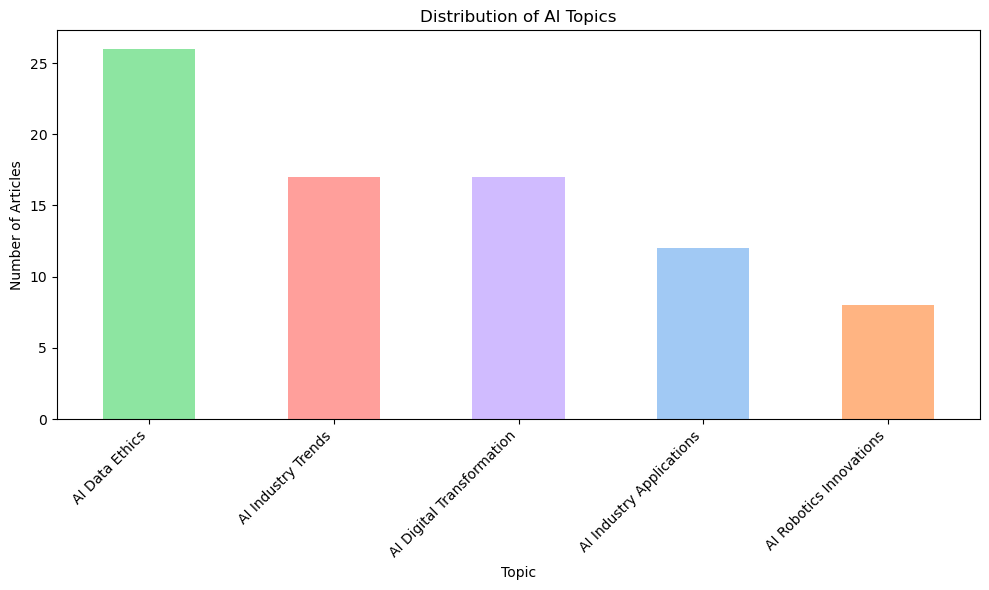

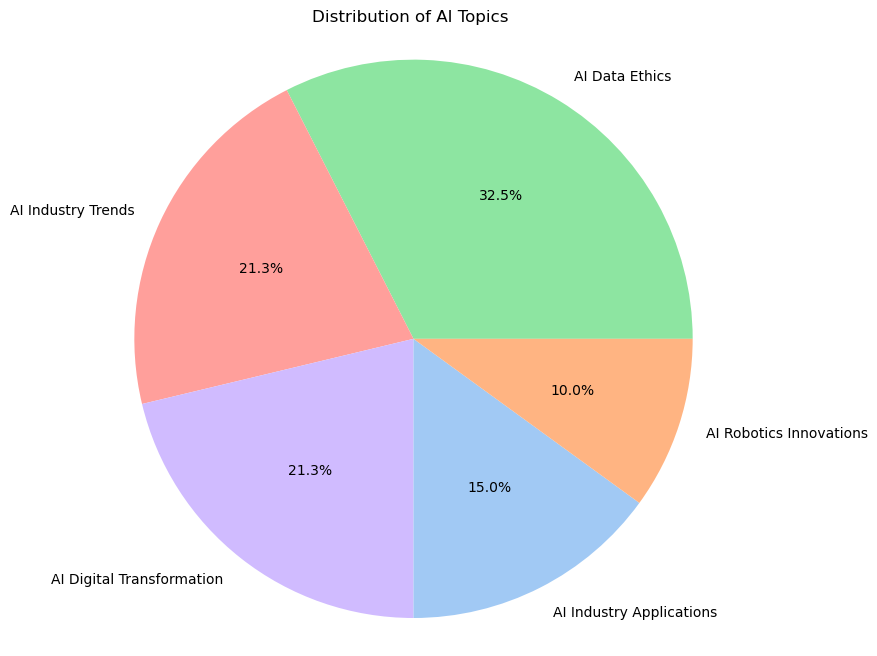

<Figure size 1200x600 with 0 Axes>

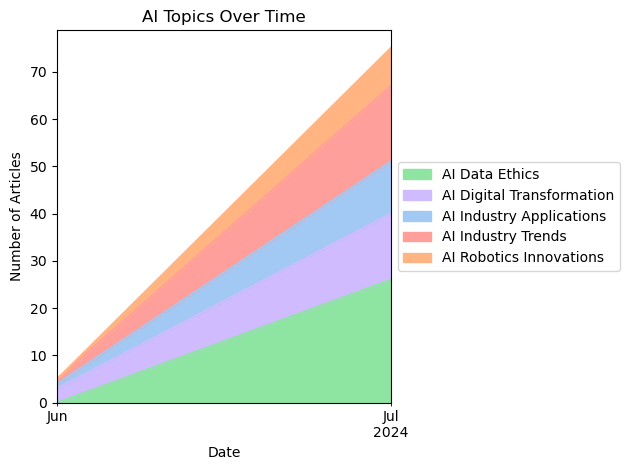

In [37]:

# Create a dictionary to map topic numbers to names
topic_names = {
    0: "AI Industry Applications",
    1: "AI Robotics Innovations",
    2: "AI Data Ethics",
    3: "AI Industry Trends",
    4: "AI Digital Transformation"
}

# Update your dataframe to use topic names
df['topic_name'] = df['dominant_topic'].map(topic_names)

# Generate a color palette
colors = sns.color_palette('pastel', n_colors=len(topic_names))
color_dict = dict(zip(topic_names.values(), colors))

# 1. Topic Distribution Over Time (Line Plot)
plt.figure(figsize=(12, 6))

# Group by month and topic, then count
topic_over_time = df.groupby([pd.Grouper(key='Published', freq='ME'), 'topic_name']).size().unstack(fill_value=0)

# Plot each topic
for topic in topic_names.values():
    plt.plot(topic_over_time.index, topic_over_time[topic], label=topic, color=color_dict[topic], marker='o')

plt.title('AI Topics Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Overall Topic Distribution (Bar Chart)
topic_distribution = df['topic_name'].value_counts()

plt.figure(figsize=(10, 6))
topic_distribution.plot(kind='bar', color=[color_dict[topic] for topic in topic_distribution.index])
plt.title('Distribution of AI Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Pie Chart of Topic Distribution
plt.figure(figsize=(10, 8))
plt.pie(topic_distribution, labels=topic_distribution.index, autopct='%1.1f%%', 
        colors=[color_dict[topic] for topic in topic_distribution.index])
plt.title('Distribution of AI Topics')
plt.axis('equal')
plt.show()

# 4. Stacked Area Chart of Topics Over Time
plt.figure(figsize=(12, 6))
topic_over_time.plot(kind='area', stacked=True, 
                     color=[color_dict[topic] for topic in topic_over_time.columns])
plt.title('AI Topics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
total_articles = topic_distribution.sum()
topic_percentages = (topic_distribution / total_articles * 100).round(1)
print(topic_percentages)

topic_name
AI Data Ethics               32.5
AI Industry Trends           21.2
AI Digital Transformation    21.2
AI Industry Applications     15.0
AI Robotics Innovations      10.0
Name: count, dtype: float64


# Conclusion:
1. 